In [1]:
import numpy as np
import pandas as pd

import os, sys
import random

try:
    os.chdir('CrowdInference')
    sys.path.append(os.getcwd())
except:
    pass

import crowd_inference.methods.dawid_skene as ds
import crowd_inference.methods.majority_vote as mv
import crowd_inference.methods.raykar as r
import crowd_inference.methods.raykar_plus_ds as rds
import crowd_inference.methods.classifier as cls
import benchmark as bm

from crowd_inference.truth_inference import NoFeaturesInference, TruthInference, WithFeaturesInference
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression, LogisticRegression
import matplotlib.pyplot as plt
from collections import defaultdict
import tests.data_provider as data
from tqdm.auto import tqdm

import seaborn as sns
sns.set()

from importlib import reload

def reload_all():
    reload(ds)
    reload(r)
    reload(rds)
    reload(cls)
    reload(bm)

reload(data)

<module 'tests.data_provider' from '/Users/andrey/Documents/5Course/CrowdInference/tests/data_provider.py'>

In [2]:
sentiment_data = data.SentimentDataProvider('./resources/datasets/sentiment_polarity/mturk_answers.csv',
                                       './resources/datasets/sentiment_polarity/polarity_gold_lsa_topics.csv')

Iter 00, logit: -3.019628
Iter 10, logit: -2.783967
---------------
Label accuracy is 0.915383076615323
--------------------------------------------------
Data has 600 features
Iter 00, logit: -2.990713
Iter 10, logit: -2.647791
(4999, 600)
Classifier train accuracy is 0.7091418283656732
(5428, 600)
Classifier test accuracy is 0.6352247605011054
Label accuracy is 0.9181836367273455
--------------------------------------------------
Data has 600 features
Iter 00, logit: -0.538373
Average Raykar weight is 0.0
Iter 10, logit: -0.450310
Average Raykar weight is 0.0
Average Raykar weight is 0.0
Classifier train accuracy is 0.7085417083416683
Classifier test accuracy is 0.6381724392041267
Label accuracy is 0.9147829565913183
--------------------------------------------------
3
[('DS', 0.915383076615323), ('Raykar', 0.9181836367273455), ('Raykar+DS', 0.9147829565913183)]


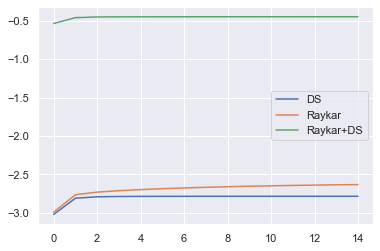

In [3]:
reload_all()
sentiment_methods, sentiment_points, advantages_matrix = bm.compare_methods(sentiment_data, max_iter=15)

Number of data points: 4999


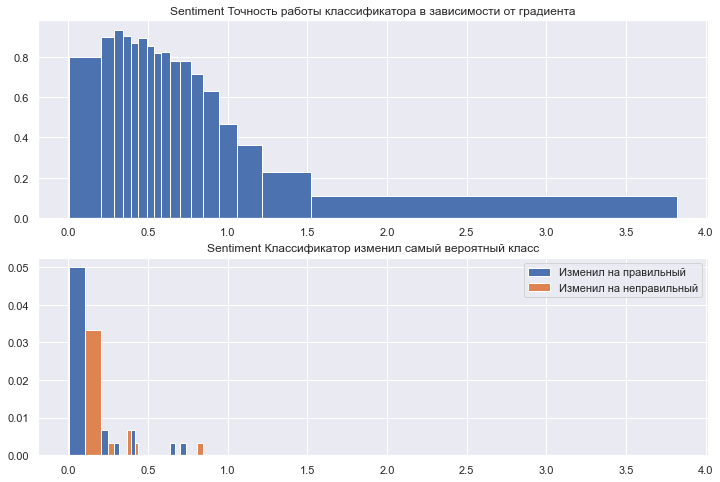

In [4]:
buckets, confidences, wrong, correct = bm.build_grad_hist(sentiment_data, sentiment_methods, sentiment_points, 'Sentiment', 300)
condidence_sentiment = bm.get_confidence(buckets[0], confidences[0])